<a href="https://www.kaggle.com/code/sjagkoo7/data-analysis-regression-classification?scriptVersionId=141127084" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

`We will study below on this dataset :`
* Explatory Data Analysis
* Prediction of wheather student gets placed or not (Binary Classification)
* Determining characteristics affecting placement
* Predition of Salary secured by a student (Regression)
* Determining characteristics affecting salary

`Common Questions from Dataset :`
* Does GPA affect placement?
* Does Higher Secondary School's Percentage still affect campus placement?
* Is work experience required for securing good job?
* What factor affect the salary?

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


# Reading the Dataset

In [2]:
df=pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

In [3]:
placement=df.copy()

In [4]:
#displaying first 2 rows of dataset
placement.head(2)

sl_no gender  ssc_p    ssc_b  hsc_p   hsc_b     hsc_s  degree_p  degree_t  \
0      1      M  67.00   Others  91.00  Others  Commerce     58.00  Sci&Tech   
1      2      M  79.33  Central  78.33  Others   Science     77.48  Sci&Tech   

  workex  etest_p specialisation  mba_p  status    salary  
0     No     55.0         Mkt&HR  58.80  Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28  Placed  200000.0

# Pre-Processing

In [5]:
#placement.shape
#len(placement)
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


`Here we can see there are some feature dtypes are object means these are categorical values.`  

In [6]:
#len(placement.columns)
placement.columns.to_list()

['sl_no',
 'gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'hsc_s',
 'degree_p',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p',
 'status',
 'salary']

In [7]:
#displaying unique values count for each feature in a dataset
placement.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [8]:
placement.describe()

sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000

# Null Values Check

In [9]:
placement.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
placement[placement.isna().any(axis=1)]

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
3        4      M   56.0  Central   52.0  Central   Science     52.00   
5        6      M   55.0   Others   49.8   Others   Science     67.25   
6        7      F   46.0   Others   49.2   Others  Commerce     79.00   
9       10      M   58.0  Central   70.0  Central  Commerce     61.00   
12      13      F   47.0  Central   55.0   Others   Science     65.00   
..     ...    ...    ...      ...    ...      ...       ...       ...   
198    199      F   67.0  Central   70.0  Central  Commerce     65.00   
201    202      M   54.2  Central   63.0   Others   Science     58.00   
206    207      M   41.0  Central   42.0  Central   Science     60.00   
208    209      F   43.0  Central   60.0   Others   Science     65.00   
214    215      M   62.0  Central   58.0   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  salary  
3     Sci&Tech     No    66.00         Mkt&HR  59.43  Not Placed     NaN  
5     Sci&Tech    Yes    55.00        Mkt&Fin  51.58  Not Placed     NaN  
6    Comm&Mgmt     No    74.28        Mkt&Fin  53.29  Not Placed     NaN  
9    Comm&Mgmt     No    54.00        Mkt&Fin  52.21  Not Placed     NaN  
12   Comm&Mgmt     No    62.00         Mkt&HR  65.04  Not Placed     NaN  
..         ...    ...      ...            ...    ...         ...     ...  
198     Others     No    88.00         Mkt&HR  71.96  Not Placed     NaN  
201  Comm&Mgmt     No    79.00         Mkt&HR  58.44  Not Placed     NaN  
206  Comm&Mgmt     No    97.00        Mkt&Fin  53.39  Not Placed     NaN  
208  Comm&Mgmt     No    92.66         Mkt&HR  62.92  Not Placed     NaN  
214  Comm&Mgmt     No    89.00         Mkt&HR  60.22  Not Placed     NaN  

[67 rows x 15 columns]

`67 Missing values in Salary for students who didn't get placed. NaN Value needs to be filled.`

# Placement Dataset - Summary

In [11]:
summary=pd.DataFrame(index=placement.columns)
summary['count']=placement.count()
summary['nunique']=placement.nunique()
summary['null']=placement.isna().sum()
summary['dtype']=placement.dtypes
summary=pd.concat([summary,placement.describe().T.drop('count',axis=1)],axis=1)
summary

count  nunique  null    dtype           mean           std  \
sl_no             215      215     0    int64     108.000000     62.209324   
gender            215        2     0   object            NaN           NaN   
ssc_p             215      103     0  float64      67.303395     10.827205   
ssc_b             215        2     0   object            NaN           NaN   
hsc_p             215       97     0  float64      66.333163     10.897509   
hsc_b             215        2     0   object            NaN           NaN   
hsc_s             215        3     0   object            NaN           NaN   
degree_p          215       89     0  float64      66.370186      7.358743   
degree_t          215        3     0   object            NaN           NaN   
workex            215        2     0   object            NaN           NaN   
etest_p           215      100     0  float64      72.100558     13.275956   
specialisation    215        2     0   object            NaN           NaN   
mba_p             215      205     0  float64      62.278186      5.833385   
status            215        2     0   object            NaN           NaN   
salary            148       45    67  float64  288655.405405  93457.452420   

                      min         25%       50%         75%        max  
sl_no                1.00      54.500     108.0     161.500     215.00  
gender                NaN         NaN       NaN         NaN        NaN  
ssc_p               40.89      60.600      67.0      75.700      89.40  
ssc_b                 NaN         NaN       NaN         NaN        NaN  
hsc_p               37.00      60.900      65.0      73.000      97.70  
hsc_b                 NaN         NaN       NaN         NaN        NaN  
hsc_s                 NaN         NaN       NaN         NaN        NaN  
degree_p            50.00      61.000      66.0      72.000      91.00  
degree_t              NaN         NaN       NaN         NaN        NaN  
workex                NaN         NaN       NaN         NaN        NaN  
etest_p             50.00      60.000      71.0      83.500      98.00  
specialisation        NaN         NaN       NaN         NaN        NaN  
mba_p               51.21      57.945      62.0      66.255      77.89  
status                NaN         NaN       NaN         NaN        NaN  
salary          200000.00  240000.000  265000.0  300000.000  940000.00

# Pandas Profiler's Interactive Report

In [12]:
placement.profile_report(title='Placement - Report',progress_bar=False)

In [13]:
#Drop the sl_no becuase it is ir-relavent and no use.
placement.drop('sl_no',axis=1,inplace=True)

# Co-Relation Matrix

In [14]:
#co-relation
corr=placement.corr()
corr

ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.035330
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.076819
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364 -0.019272
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.178307
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.175013
salary    0.035330  0.076819 -0.019272  0.178307  0.175013  1.000000

Text(0.5, 1.0, 'Correlation Matrix\n')

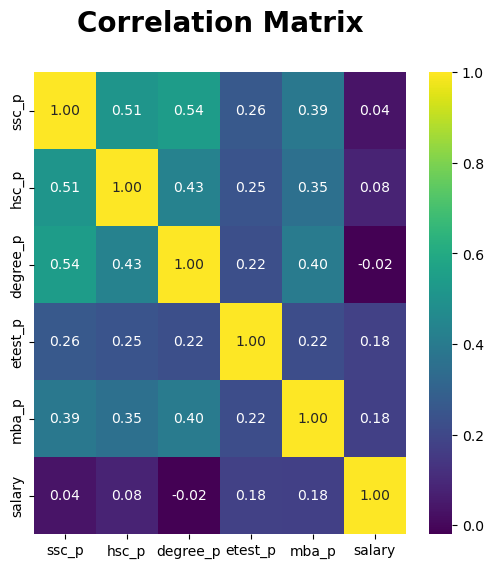

In [15]:
#Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='viridis')
plt.title('Correlation Matrix\n',fontsize = 20, weight = 'bold')

# Feature: Gender
#### Does gender affect placements?

In [16]:
placement.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

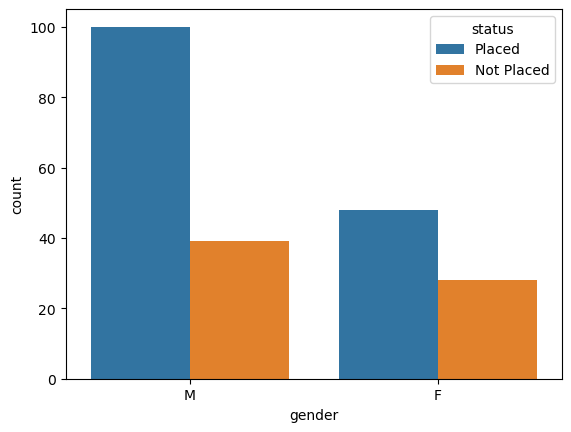

In [17]:
sns.countplot(data=placement,x='gender',hue='status')

Text(0.5, 0, 'Salary (100k)')

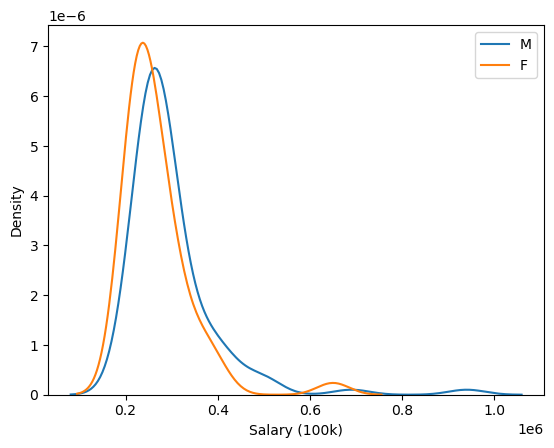

In [18]:
#This plot ignores NaN values for salary, igoring students who are not placed
sns.kdeplot(placement.salary[placement.gender=='M'])
sns.kdeplot(placement.salary[placement.gender=='F'])
plt.legend(['M','F'])
plt.xlabel("Salary (100k)")

<AxesSubplot:xlabel='salary', ylabel='gender'>

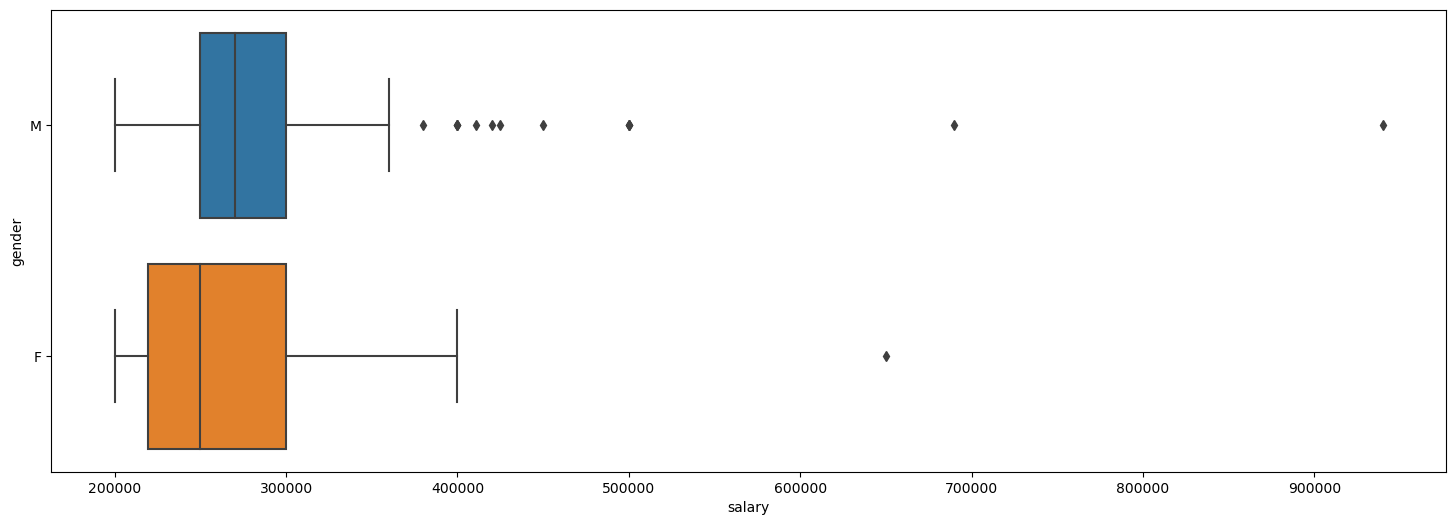

In [19]:
plt.figure(figsize=(18,6))
sns.boxplot(x="salary",y="gender",data=placement)

In [20]:
placement.gender[placement.status=="Not Placed"].value_counts()


M    39
F    28
Name: gender, dtype: int64

> Insights
* We have  139 Male studets and 76 Female students.
* 28 Female and 39 Male students are not placed. Male students have comparatively higher placemets.
* More outliers on Male -> Male students are getting high salary jobs.
* Male students are offered slightly greater salary than female on an average.

# Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)
##### Does Secondary Education affect placements?

Text(0.5, 0, 'Secondary Education Percentage')

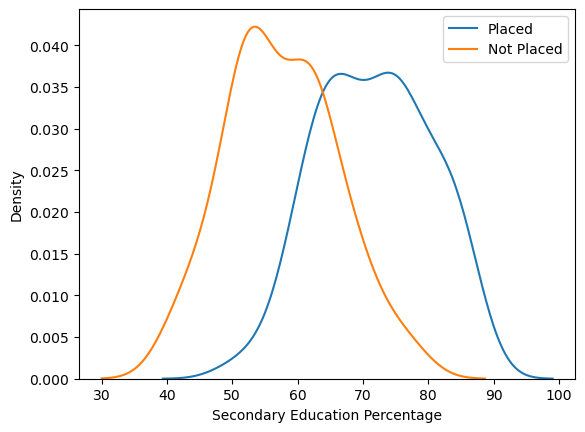

In [21]:
sns.kdeplot(placement.ssc_p[placement.status=='Placed'])
sns.kdeplot(placement.ssc_p[placement.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel('Secondary Education Percentage')


> Insight
* All students with Secondary Education Percentage above 90% are placed
* All students with Secondary Education Percentage below 30% are not-placed
* Students with good Secondary Education Percentage are placed on average.


<AxesSubplot:xlabel='ssc_b', ylabel='count'>

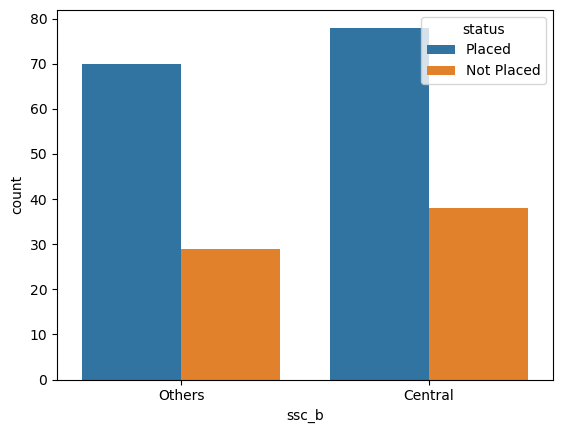

In [22]:
sns.countplot(x="ssc_b",hue='status',data=placement)

> Board Of Education does not affect Placement Status much

<AxesSubplot:xlabel='salary', ylabel='ssc_b'>

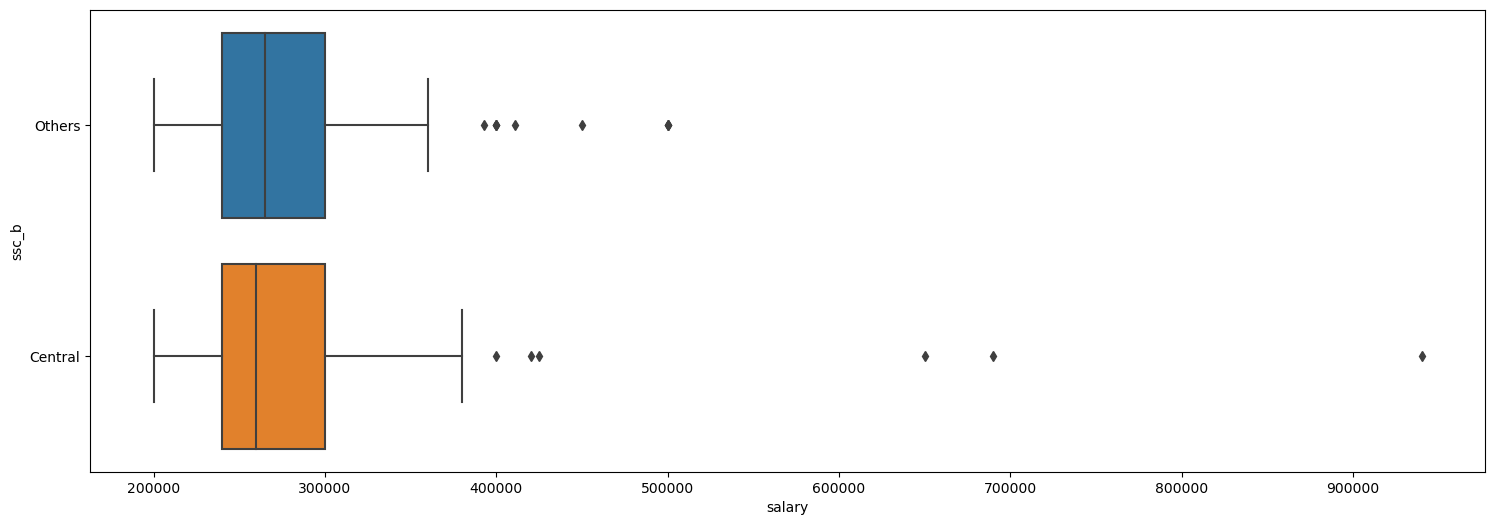

In [23]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='ssc_b',data=placement)

> Outliers on both, but students from Central Board are getting the highly paid jobs.

<AxesSubplot:xlabel='ssc_p', ylabel='salary'>

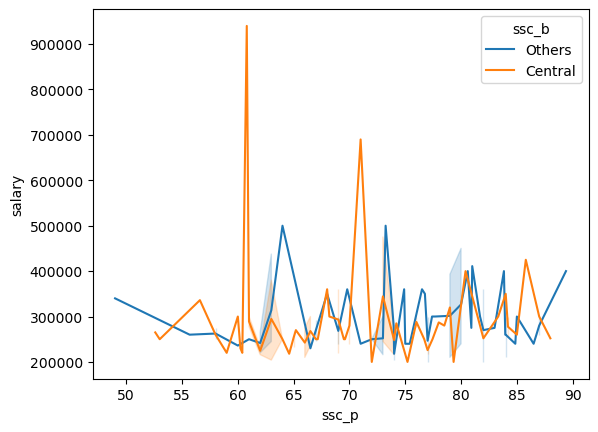

In [24]:
sns.lineplot(x="ssc_p",y="salary",hue='ssc_b',data=placement)

> Insight
* No specific pattern (correlation) between Secondary Education Percentage and Salary.
* Board of Education is Not Affecting Salary

# Feature: hsc_p (Higher Secondary Education percentage), hsc_b (Board Of Education), hsc_s (Specialization in Higher Secondary Education
##### Does Higher Secondary School affect Placements?

Text(0.5, 0, 'Higher Secondary Education Percentage')

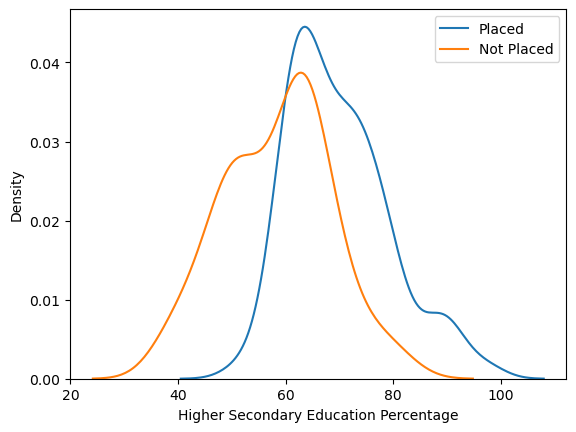

In [25]:
#hsc_p,hsc_b,hsc_s
sns.kdeplot(placement.hsc_p[placement.status=='Placed'])
sns.kdeplot(placement.hsc_p[placement.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Higher Secondary Education Percentage")

> Insight
* All students with Higher Secondary Education Percentage above 95% are placed
* All students with Higher Secondary Education Percentage below 40% are not-placed
* More placements for percentage above 65%

<AxesSubplot:xlabel='hsc_b', ylabel='count'>

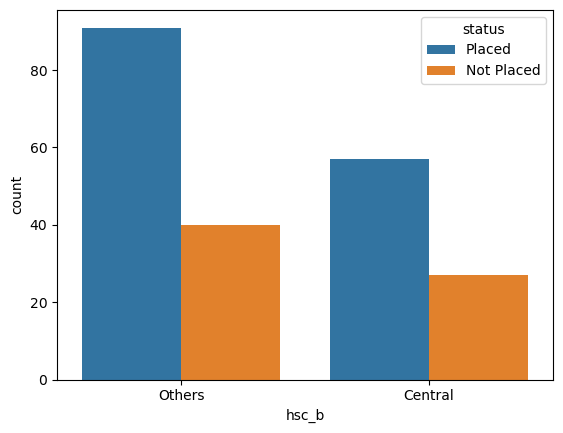

In [26]:
sns.countplot(x='hsc_b',hue='status',data=placement)

> Education Board again, doesn't affect placement status much

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

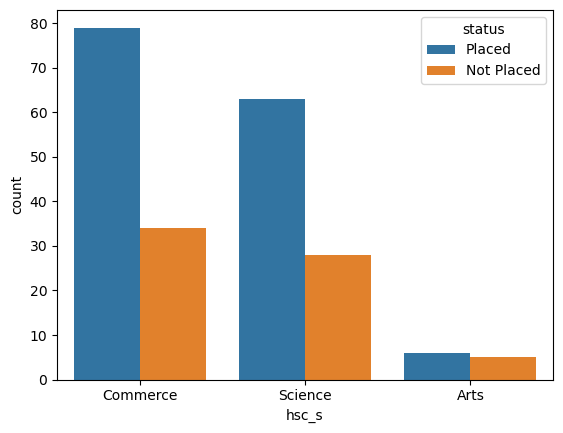

In [27]:
sns.countplot(x='hsc_s',hue='status',data=placement)

> We have very less students with Arts specialization.

<AxesSubplot:xlabel='salary', ylabel='hsc_b'>

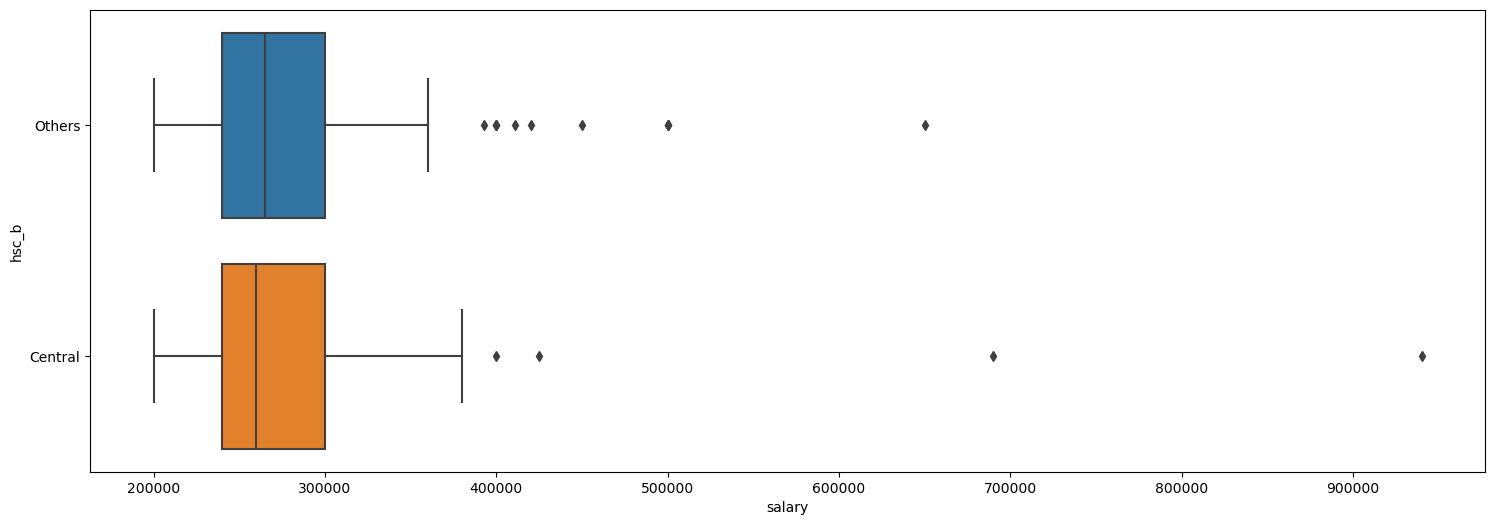

In [28]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_b',data=placement)

> Insight
* Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.

<AxesSubplot:xlabel='salary', ylabel='hsc_s'>

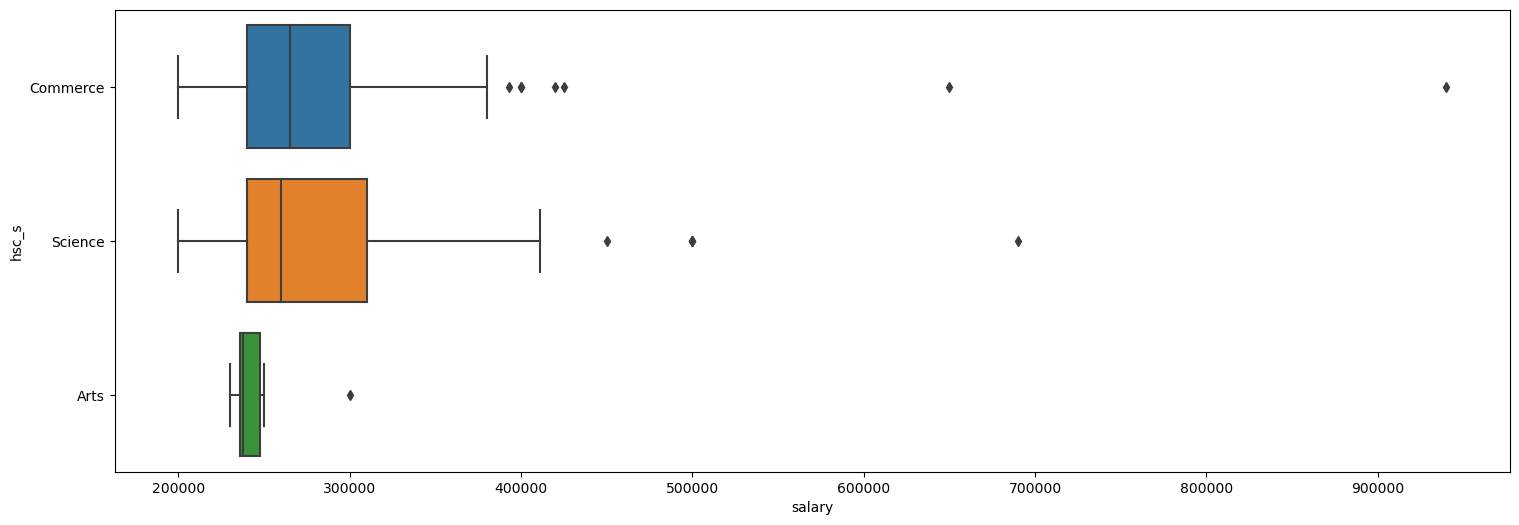

In [29]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary',y='hsc_s',data=placement)

> Insight
*  samples of students with Arts Major,aren't getting good salaries.
* Commerse students have slightly better placement status.

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

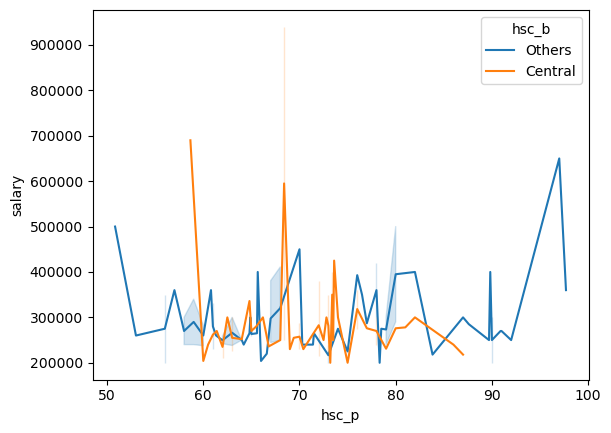

In [30]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_b',data=placement)

> Insight
* High salary from both Central and Other.
* High salary for both high and low percentage.
* both these feature doesnot affect salary.

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

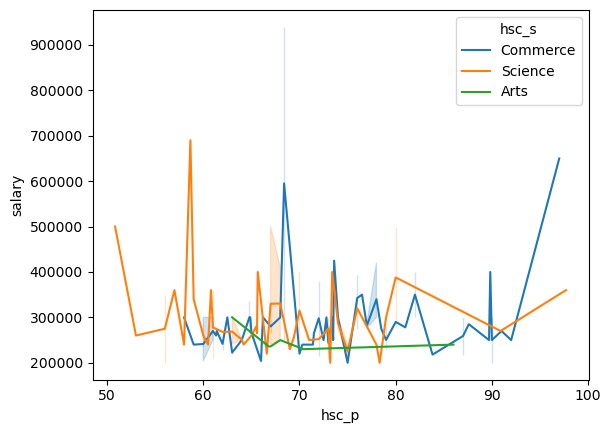

In [31]:
sns.lineplot(x='hsc_p',y='salary',hue='hsc_s',data=placement)

> Insight
* Student with Art Specialization surprisingly have comparatively low salary

# Feature: degree_p (Degree Percentage), degree_t (Under Graduation Degree Field)
##### Does Under Graduate affect placements?

<AxesSubplot:xlabel='degree_t', ylabel='count'>

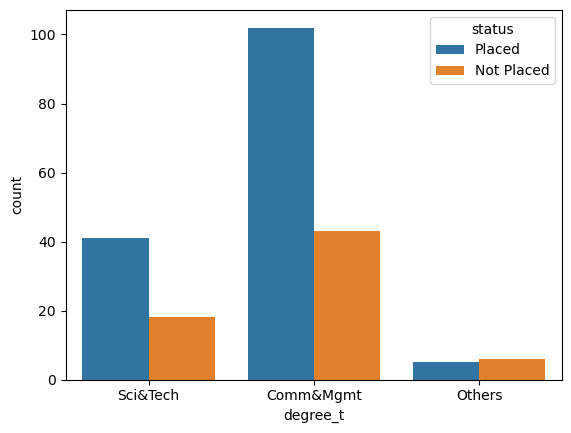

In [32]:
sns.countplot(data=placement,hue='status',x='degree_t')

> Insight
* We have very less students with "Other". We cant make decision from few cases.
* Placement for Comm & Mgmt is high as comapre to other degree field.

Text(0.5, 0, 'Under Graduate Percentage')

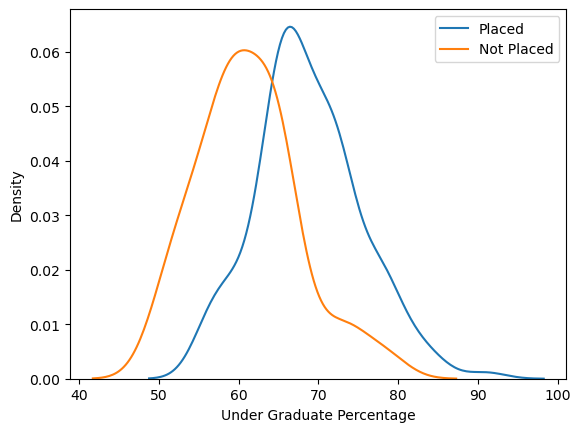

In [33]:
sns.kdeplot(placement.degree_p[placement.status=='Placed'])
sns.kdeplot(placement.degree_p[placement.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])
plt.xlabel("Under Graduate Percentage")

<AxesSubplot:xlabel='salary', ylabel='degree_t'>

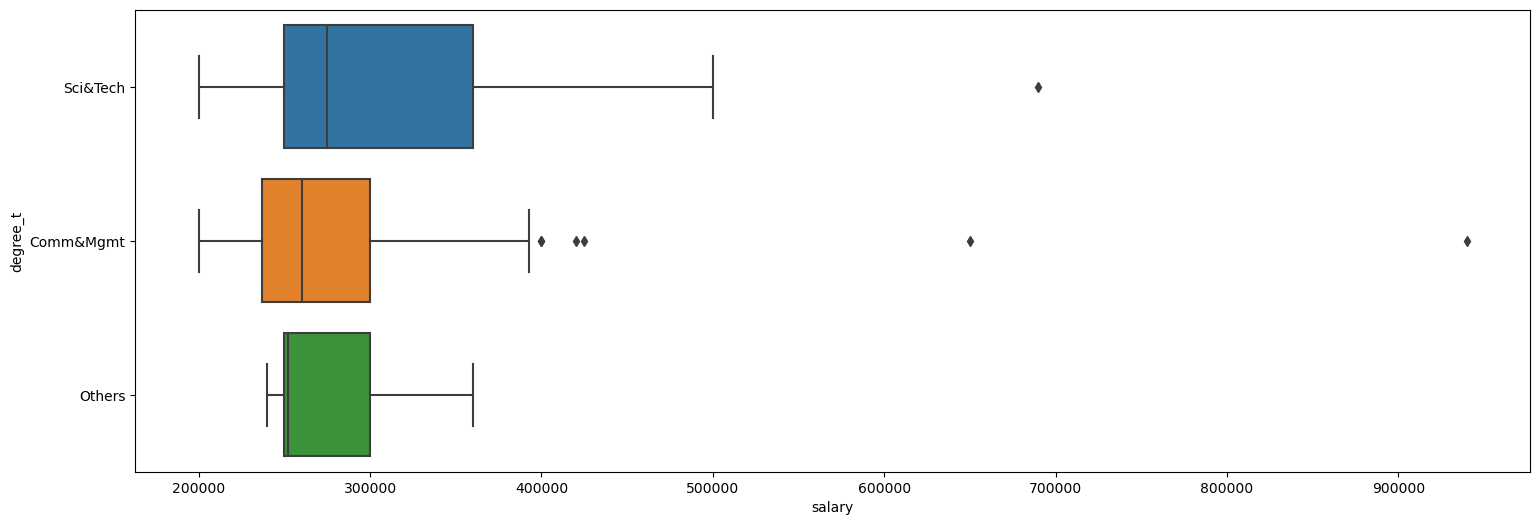

In [34]:
plt.figure(figsize=(18,6))
sns.boxplot(data=placement,x='salary',y='degree_t')

> Insight
* comm & mgmt are getting more high paid jobs which leads to outliers

<AxesSubplot:xlabel='degree_p', ylabel='salary'>

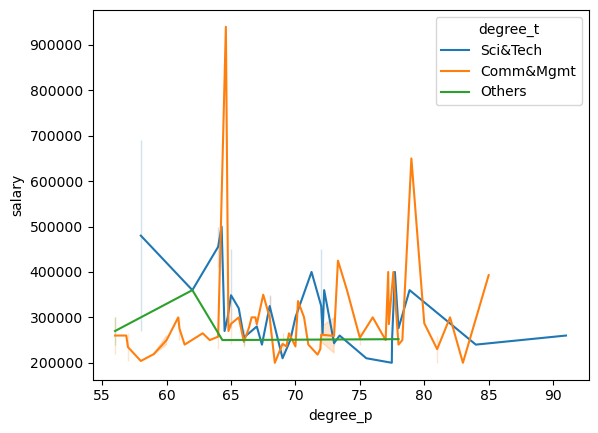

In [35]:
sns.lineplot(data=placement,x='degree_p',y='salary',hue='degree_t')

> Insight
* min.55 degree percentage to get placement.
* comm & mgmt has received highest and degree percentage around 65
* Percentage does not seem to affect salary

# Feature: workex (Work Experience)
##### Does Work Experience affect placements?

<AxesSubplot:xlabel='workex', ylabel='count'>

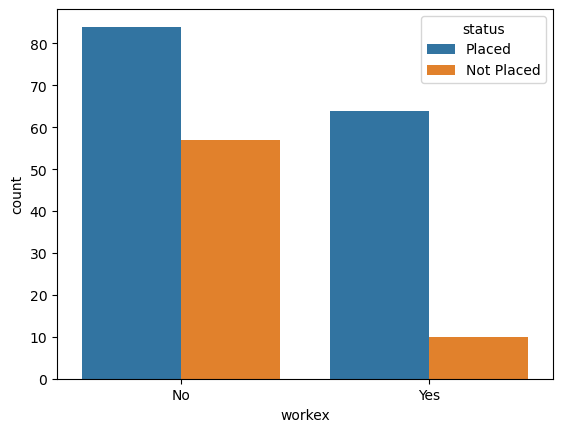

In [36]:
sns.countplot(data=placement,x='workex',hue='status')

> Insight
* chances of placement for having work experience is high


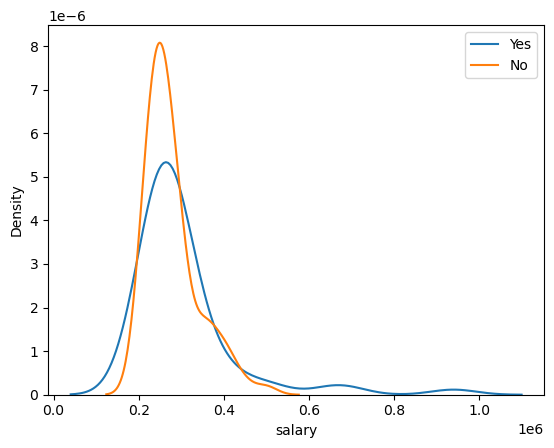

In [37]:
sns.kdeplot(placement.salary[placement.workex=='Yes'])
sns.kdeplot(placement.salary[placement.workex=='No'])
plt.legend(['Yes','No'])

<AxesSubplot:xlabel='salary', ylabel='workex'>

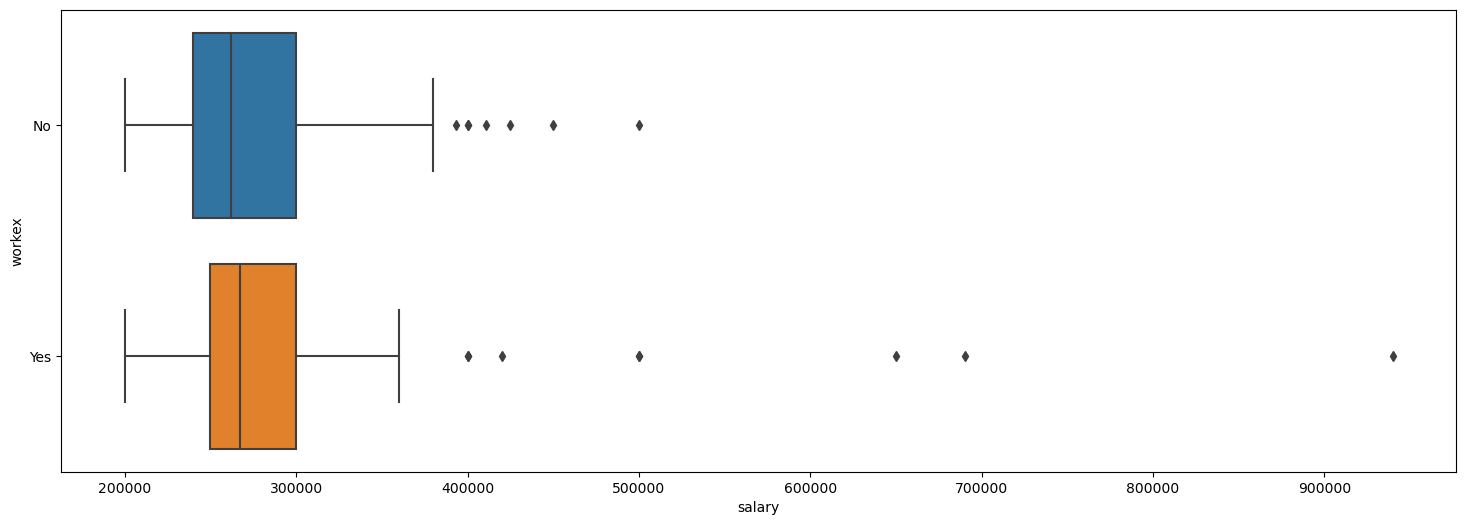

In [38]:
plt.figure(figsize=(18,6))
sns.boxplot(data=placement,x='salary',y='workex')

> Insight
* Work experience Yes getting high paid jobs as compare to No
* Outliers are for Yes and No both end

# Feature: etest_p (Employability test percentage)
##### Does Employability test percentage affect placements?

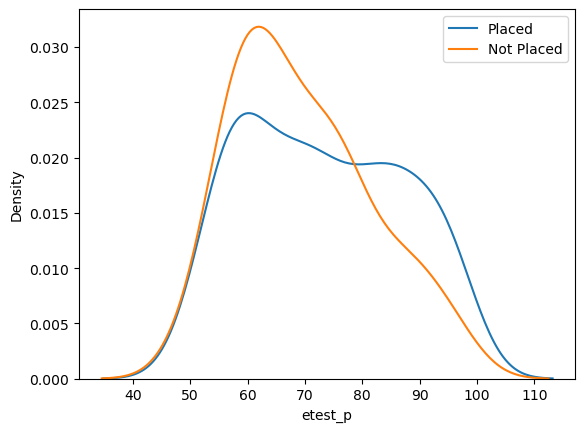

In [39]:
sns.kdeplot(placement.etest_p[placement.status=='Placed'])
sns.kdeplot(placement.etest_p[placement.status=='Not Placed'])
plt.legend(['Placed','Not Placed'])

> Insight
* High overlap -> It does not affect placement status much
* More "Not Placed" on percentage 50-70 range and more placed on 80% percentage range

<AxesSubplot:xlabel='etest_p', ylabel='salary'>

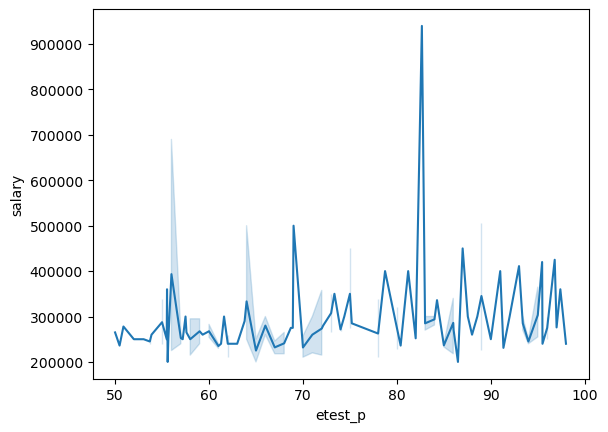

In [40]:
sns.lineplot(data=placement,x='etest_p',y='salary')

> Insight
* This feature surprisingly does not affect placements and salary much

# Feature: specialisation (Post Graduate Specialization)
##### Does specialisation affect placements?

<AxesSubplot:xlabel='specialisation', ylabel='count'>

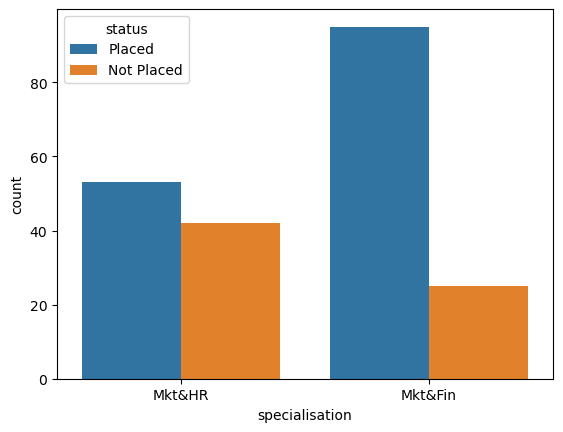

In [41]:
sns.countplot(data=placement,x='specialisation',hue='status')

> Insight
* This feature **affects** Placement status.
* Comparitively very low not-placed students in Mkt&Fin Section

<AxesSubplot:xlabel='salary', ylabel='specialisation'>

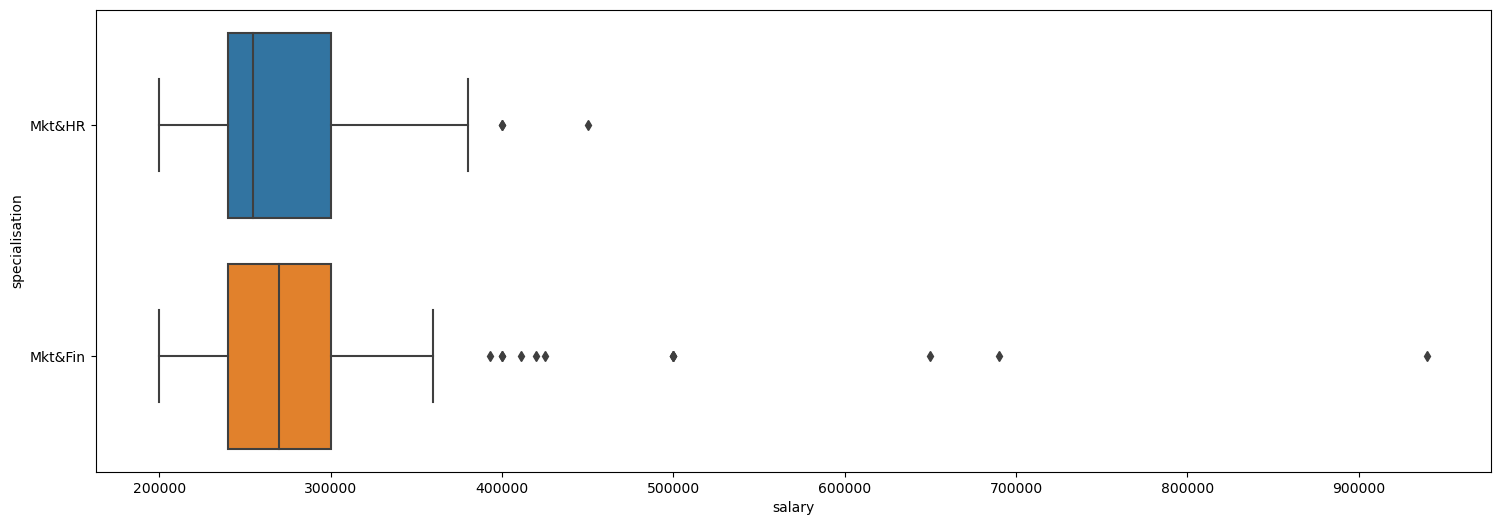

In [42]:
plt.figure(figsize=(18,6))
sns.boxplot(data=placement,x='salary',y='specialisation')

> Insight
* More Highly Paid Jobs for Mkt&Fin students

# Feature: mba_p (MBA percentage)
##### Does MBA Percentage affect placements?

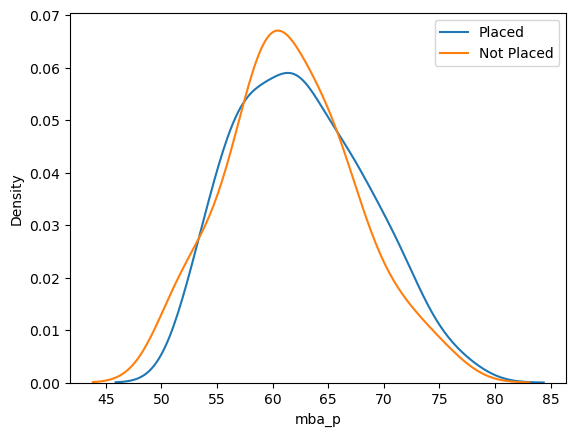

In [43]:
sns.kdeplot(placement.mba_p[placement.status=="Placed"])
sns.kdeplot(placement.mba_p[placement.status=="Not Placed"])
plt.legend(['Placed','Not Placed'])

> Insight
* More Placement after 52 mba_p

<AxesSubplot:xlabel='mba_p', ylabel='status'>

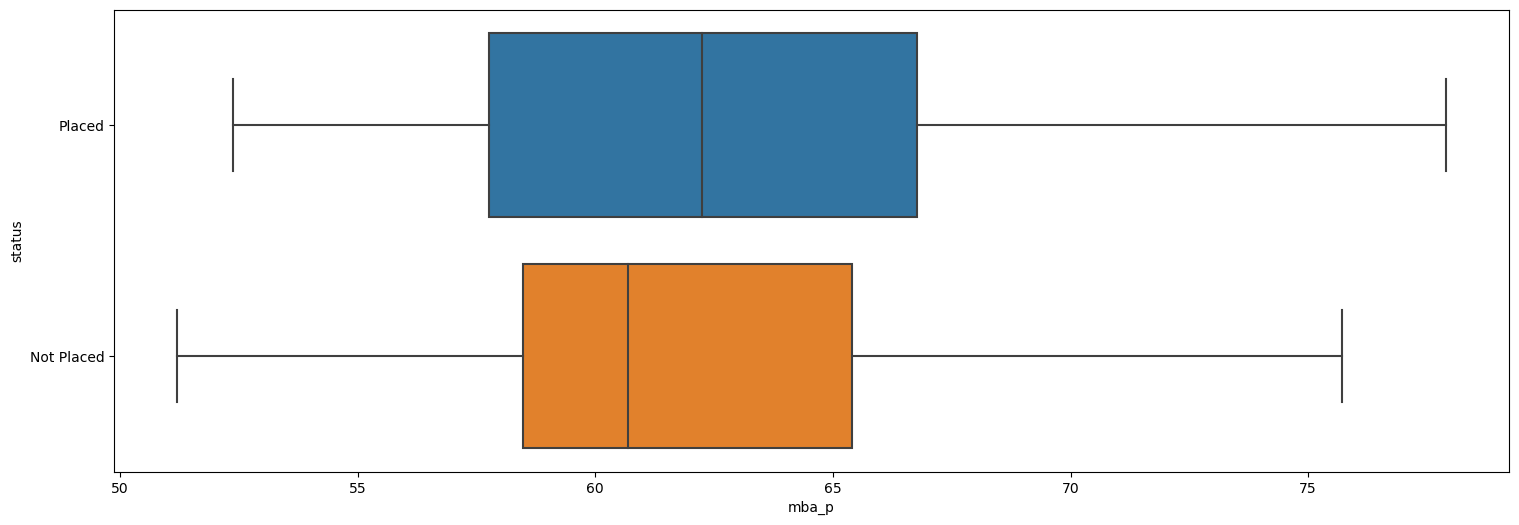

In [44]:
plt.figure(figsize=(18,6))
sns.boxplot(data=placement,x='mba_p',y='status')

> Insight
* there is no outlier so mba_p doesn't have much effect.

<AxesSubplot:xlabel='mba_p', ylabel='salary'>

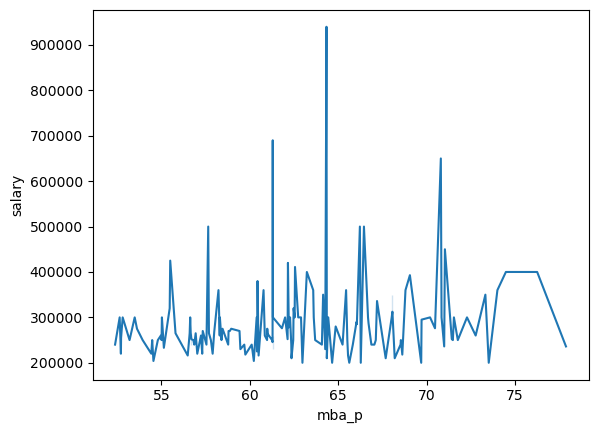

In [45]:
sns.lineplot(data=placement,x='mba_p',y='salary')

> Insight
* MBA Percentage also deos not affect salary much

# Feature Selection

> Using Only following features (Ignoring Board of Education -> they didnt seem to have much effect)
* Gender
* Secondary Education percentage
* Higher Secondary Education Percentsge
* Specialization in Higher Secondary Education
* Under Graduate Dergree Percentage
* Under Graduation Degree Field
* Work Experience
* Employability test percentage
* Specialization
* MBA Percentage 

Will compute feature importance in coming cells on.

In [46]:
# dropping Board of Education 
placement.drop(['ssc_b','hsc_b'],axis=1,inplace=True)

# Feature Encoding

In [47]:
#categorical feature in dataset
# ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex',specialisation','status']

In [48]:
#Method 1: Data Wrangling
# placement['gender']=placement.gender.map({'M':0,'F':1})
# placement['hsc_s']=placement.hsc_s.map({'Commerce':0, 'Science':1, 'Arts':2})
# placement['degree_t']=placement.degree_t.map({'Sci&Tech':0, 'Comm&Mgmt':1, 'Others':2})
# placement['workex']=placement.workex.map({'No':0, 'Yes':1})
# placement['specialisation']=placement.specialisation.map({'Mkt&HR':0, 'Mkt&Fin':1})
# placement['status']=placement.status.map({'Placed':1, 'Not Placed':0})

In [49]:
# placement.head()

In [50]:
#Method 2: Data Wrangling
#Code for categorical data mappings:- Need to test by calling all chnages at same time b/z getting KeyValue Error.
# def transform_categorical_column(data,column_name):
#     categories=data[column_name].value_counts().index.to_list()
#     map_cat={k:v for v,k in enumerate(categories)}
#     rev_map_cat={v:k for k,v in map_cat.items()}
#     data[column_name]=data[column_name].map(map_cat)
#     return data,map_cat,rev_map_cat

In [51]:
# placement, map_gender, reverse_map_gender=transform_categorical_column(placement, 'gender')
# placement, map_hsc_s, reverse_map_hsc_s=transform_categorical_column(placement, 'hsc_s')
# placement, map_degree_t, reverse_map_degree_t=transform_categorical_column(placement, 'degree_t')
# placement, map_workex, reverse_map_workex=transform_categorical_column(placement, 'workex')
# placement, map_specialisation, reverse_map_specialisation=transform_categorical_column(placement, 'specialisation')
# placement, map_status, reverse_map_status=transform_categorical_column(placement, 'status')

In [52]:
# placement.head()

* **Ordinal Encoding**
* Ordinal encoding is used when the categorical data has a natural order or ranking
* For example, if the categories are "Low," "Medium," and "High," ordinal encoding may assign them integer values like 1, 2, and 3, respectively.

In [53]:
#Method 3: Ordinal Encoding
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['gender','hsc_s','degree_t','workex','specialisation','status']) #cols -- is pre-define variable
placement=encoder.fit_transform(placement) 
placement.head(2)

gender  ssc_p  hsc_p  hsc_s  degree_p  degree_t  workex  etest_p  \
0       1  67.00  91.00      1     58.00         1       1     55.0   
1       1  79.33  78.33      2     77.48         1       2     86.5   

   specialisation  mba_p  status    salary  
0               1  58.80       1  270000.0  
1               2  66.28       1  200000.0

# Feature Scaling - for Classification
* **MinMaxScaler**
* Each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.
* MinMaxScaler doesn’t reduce the importance of outliers.
* The default range for the feature returned by MinMaxScaler is 0 to 1.

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(placement.drop(['status','salary'],axis=1))
X_scaled=pd.DataFrame(X_scaled,columns=['gender','ssc_p','hsc_p','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p'])
X_scaled.head(2)

gender     ssc_p     hsc_p  hsc_s  degree_p  degree_t  workex   etest_p  \
0     0.0  0.538240  0.889621    0.0  0.195122       0.0     0.0  0.104167   
1     0.0  0.792414  0.680890    0.5  0.670244       0.0     1.0  0.760417   

   specialisation     mba_p  
0             0.0  0.284483  
1             1.0  0.564843

# Placement Prediction

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [56]:
#['sl_no','gender','ssc_p','ssc_b','hsc_p','hsc_b','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p','status','salary']
# Seperating Features and Target
X=X_scaled.copy()
y=placement['status']

In [57]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Decision Tree
**Using Decision Tree based Algorithm does not require feature scaling, and works great also in presence of categorical columns without ONE_HOT Encoding**

In [58]:
#cross vaildation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
dtree=DecisionTreeClassifier(criterion="entropy")
kf=KFold(n_splits=5)
score=cross_val_score(dtree,X,y,cv=kf)
print(f'Decision tree cross validation score : {score}')
print(f'Decision tree cross validation avergage score : {score.mean()}')

Decision tree cross validation score : [0.86046512 0.81395349 0.79069767 0.8372093  0.76744186]
Decision tree cross validation avergage score : 0.813953488372093


In [59]:
#training & prediction
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [60]:
#accuracy
acc_dtree=accuracy_score(y_test,y_pred)
acc_dtree

0.7846153846153846

In [61]:
#accuracy report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.82      0.85        50
           2       0.53      0.67      0.59        15

    accuracy                           0.78        65
   macro avg       0.71      0.74      0.72        65
weighted avg       0.81      0.78      0.79        65



In [62]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[41  9]
 [ 5 10]]


In [63]:
# Feature Importance
feature_importance=pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_importance

ssc_p             0.386412
mba_p             0.187397
hsc_p             0.180215
degree_p          0.124075
etest_p           0.045387
gender            0.044333
hsc_s             0.032181
degree_t          0.000000
workex            0.000000
specialisation    0.000000
dtype: float64

# Random Forest Classifier

In [64]:
#Cross Validation
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
score=cross_val_score(rfc,X,y,cv=kf) #kf defined in decision tree cross validation 
print(f'Random Forest cross validation score : {score}')
print(f'Random Forest cross validation avergage score : {score.mean()}')

Random Forest cross validation score : [0.86046512 0.8372093  0.90697674 0.86046512 0.74418605]
Random Forest cross validation avergage score : 0.8418604651162791


In [65]:
#training & prediction
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [66]:
#accuracy
acc_rfc=accuracy_score(y_test,y_pred)
acc_rfc

0.8923076923076924

In [67]:
#accuracy report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93        50
           2       0.75      0.80      0.77        15

    accuracy                           0.89        65
   macro avg       0.84      0.86      0.85        65
weighted avg       0.90      0.89      0.89        65



In [68]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[46  4]
 [ 3 12]]


In [69]:
# Feature Importance 
feature_importance=pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_importance

ssc_p             0.233717
degree_p          0.217206
hsc_p             0.184488
mba_p             0.108254
etest_p           0.094480
specialisation    0.051100
workex            0.043689
gender            0.029260
degree_t          0.020776
hsc_s             0.017029
dtype: float64

# Logistic Regression

In [70]:
#Cross Validation
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
score=cross_val_score(lor,X,y,cv=kf)
print(f'Logistic Regression cross validation score : {score}')
print(f'Logistic Regression cross validation score : {score.mean()}')

Logistic Regression cross validation score : [0.8372093  0.8372093  0.88372093 0.86046512 0.81395349]
Logistic Regression cross validation score : 0.8465116279069766


In [71]:
#training & prediction
lor.fit(X_train,y_train)
y_pred=lor.predict(X_test)

In [72]:
#accuracy
acc_lor=accuracy_score(y_test,y_pred)
acc_lor

0.8153846153846154

In [73]:
#accuracy report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        50
           2       0.60      0.60      0.60        15

    accuracy                           0.82        65
   macro avg       0.74      0.74      0.74        65
weighted avg       0.82      0.82      0.82        65



In [74]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[44  6]
 [ 6  9]]


# Comparison of Accuracy of Models Placement

In [75]:
model=pd.DataFrame({'Models':['Decision Tree','Random Forest Calssifier','Logistic Regression'],'Accuracy':[acc_dtree*100,acc_rfc*100,acc_lor*100]})
model

Models   Accuracy
0             Decision Tree  78.461538
1  Random Forest Calssifier  89.230769
2       Logistic Regression  81.538462

# Salary Prediction

In [76]:
# Filling 0s for salary of students who didn't get placements would be bad idea as it would mean student gets placement if he earns salary.
# placement=placement.fillna(0)
# placement.loc[placement.status.isna()]

In [77]:
#Handling Salary null issues
data_reg=placement.copy()
data_reg.dropna(inplace=True)

In [78]:
# Spliting target variable and independent variables
#X= independent variables  or explanatory variable or causes variable
#y= target variable or final goal
y=data_reg['salary']

<AxesSubplot:xlabel='salary', ylabel='Density'>

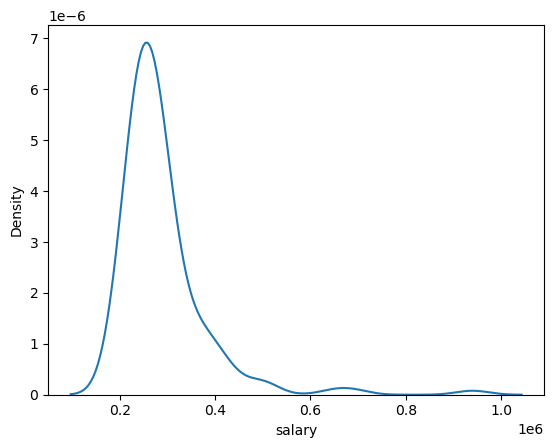

In [79]:
sns.kdeplot(y)

> Insight
* It is clear that very few students have salary greater than 400,000 (hence outliers)

In [80]:
#Outlier Removals
y=y[y< 400000]
data_reg=data_reg[data_reg['salary']<400000]
X=data_reg.drop(['salary'],axis=1)

<AxesSubplot:xlabel='salary', ylabel='Density'>

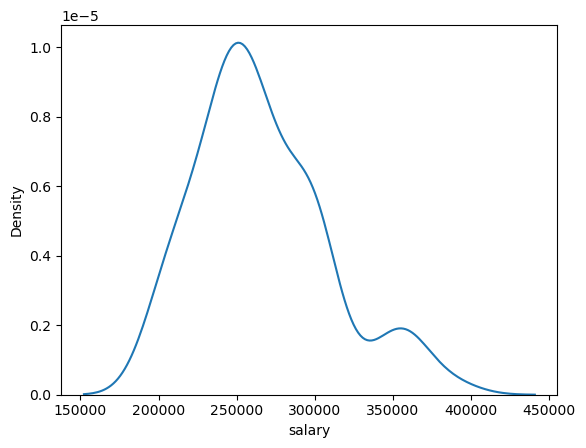

In [81]:
sns.kdeplot(y)

# Feature Scaling - for Regression

In [82]:
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X=X_scaled.copy()
X.head(2)

gender     ssc_p     hsc_p  hsc_s  degree_p  degree_t  workex   etest_p  \
0     0.0  0.461538  0.850112    0.0  0.057143       0.0     0.0  0.104167   
1     0.0  0.777692  0.566667    0.5  0.613714       0.0     1.0  0.760417   

   specialisation     mba_p  status  
0             0.0  0.251666     0.0  
1             1.0  0.544884     0.0

In [83]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Linear regression 

In [84]:
# cross validation
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
score=cross_val_score(lr,X,y,cv=kf) #kf defined in decision tree cross validation 
print(f'Linear cross Regression validation score : {score}')
print(f'Linear Regression  cross validation avergage score : {score.mean()}')

Linear cross Regression validation score : [-0.47729179  0.07986611 -0.11238737 -0.0042086   0.09087915]
Linear Regression  cross validation avergage score : -0.08462849876289787


In [85]:
#Training & Prediction
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [86]:
# Evalaution - Linear Regression
from sklearn.metrics import  r2_score
acc_lr=r2_score(y_test,y_pred)
acc_lr

-0.16876878141878837

Text(0, 0.5, 'Predicted Salaries')

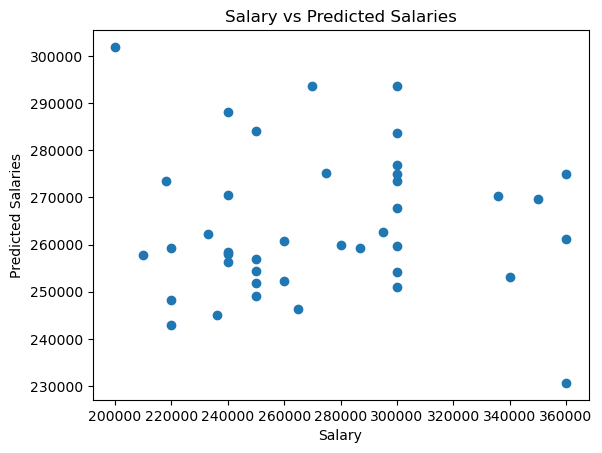

In [87]:
#Salary vs Predicted Salaries
plt.scatter(y_test,y_pred)
plt.title('Salary vs Predicted Salaries')
plt.xlabel('Salary')
plt.ylabel('Predicted Salaries')

# Decision Tree Regressor

In [88]:
#Cross Validation
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='squared_error',random_state=42)
score=cross_val_score(dtr,X,y,cv=kf)
print(f'Decision Tree Regressor corss validation score : {score}' )
print(f'Decision Tree Regressor corss validation average score : {score.mean()}')

Decision Tree Regressor corss validation score : [-0.74242227 -0.84424822 -0.6668717  -0.15884568 -1.02341343]
Decision Tree Regressor corss validation average score : -0.6871602617214364


In [89]:
#Training & Prediction
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [90]:
# Evalaution - Linear Regression
from sklearn.metrics import  r2_score
acc_dtr=r2_score(y_test,y_pred)
acc_dtr

-0.16876878141878837

Text(0, 0.5, 'Predicted Salaries')

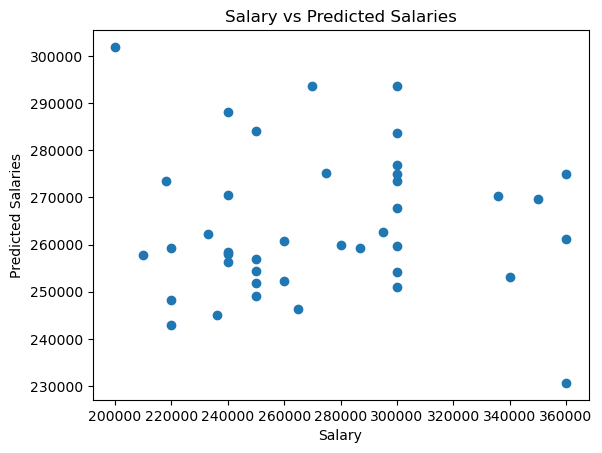

In [91]:
#Salary vs Predicted Salaries
plt.scatter(y_test,y_pred)
plt.title('Salary vs Predicted Salaries')
plt.xlabel('Salary')
plt.ylabel('Predicted Salaries')

# Random Forest Regressor

In [92]:
#cross validation
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,criterion="squared_error",random_state=42)
score=cross_val_score(rfr,X,y,cv=kf)
print(f'Random Forest Regressor Cross Validation Score : {score}')
print(f'Random Forest Regressor Cross Validation Score : {score.mean()}')

Random Forest Regressor Cross Validation Score : [-0.31090874  0.03732926 -0.3371353  -0.18731364  0.24161356]
Random Forest Regressor Cross Validation Score : -0.11128297358466546


In [93]:
#Training & Prediction
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [94]:
# Evalaution - Linear Regression
from sklearn.metrics import  r2_score
acc_rfr=r2_score(y_test,y_pred)
acc_rfr

-0.2866035061946317

Text(0, 0.5, 'Predicted Salaries')

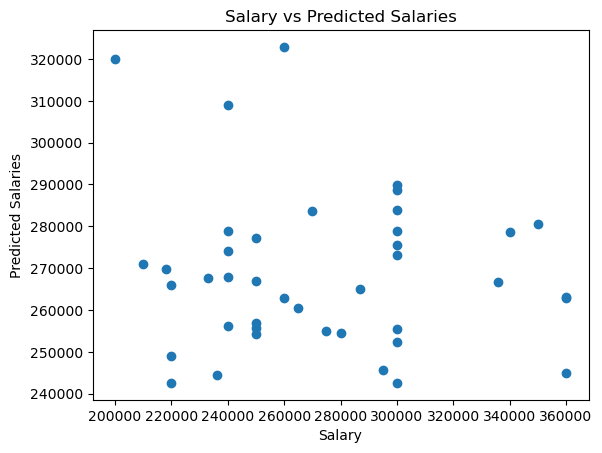

In [95]:
#Salary vs Predicted Salaries
plt.scatter(y_test,y_pred)
plt.title('Salary vs Predicted Salaries')
plt.xlabel('Salary')
plt.ylabel('Predicted Salaries')

# Comparison of Accuracy of Models Salary

In [96]:
models=pd.DataFrame({'Models':['Linear Regression','Decision Tree Regressor','Random Forest Regressor'],'Accuracy':[acc_lr*100,acc_dtr*100,acc_rfr*100]})
models

Models   Accuracy
0        Linear Regression -16.876878
1  Decision Tree Regressor -16.876878
2  Random Forest Regressor -28.660351